# <font color=blue>Machine Learning with Tree-based Models in Python</font> 

# <font color=red>01 - Classification and Regression Trees</font> 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train your first classification tree</h1><div class=""><p><p>In this exercise you'll work with the <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data" target="_blank" rel="noopener noreferrer">Wisconsin Breast Cancer Dataset</a> from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (<code>radius_mean</code>) and its mean number of concave points (<code>concave points_mean</code>).</p>
<p>The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to <code>X_train</code> and <code>X_test</code>, while the arrays of labels are assigned to <code>y_train</code> and <code>y_test</code> where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called <code>SEED</code> which is set to 1.</p></div></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

import warnings
warnings.filterwarnings('ignore')
breast_df = pd.read_csv('./data/breast-cancer.csv')
breast_df.drop('Unnamed: 32', axis=1, inplace=True)

In [2]:
X_breast = breast_df[['radius_mean', 'concave points_mean']]
y_breast = breast_df.diagnosis.replace(['M', 'B'], [1,0])
X_train, X_test, y_train, y_test = train_test_split(X_breast, y_breast, test_size=0.20, 
                                                    random_state=42, stratify = y_breast)
SEED = 1

In [3]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 0 1 0]


You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the classification tree</h1><div class=""><p><p>Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.</p>
<p>The trained model <code>dt</code> from the previous exercise is loaded in your workspace along with the test set features matrix <code>X_test</code> and the array of labels <code>y_test</code>.</p></div></div>

In [4]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Not bad! Using only two features, your tree was able to achieve an accuracy of 89%!

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Logistic regression vs classification tree</h1><div class=""><p><p>A classification tree divides the feature space into <strong>rectangular regions</strong>. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.</p>
<p>We have written a custom function called <code>plot_labeled_decision_regions()</code> that you can use to plot the decision regions of a list containing two trained classifiers. You can type <code>help(plot_labeled_decision_regions)</code> in the IPython shell to learn more about this function. </p>
<p><code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>, the model <code>dt</code> that you've trained in an earlier <a href="https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=2" target="_blank" rel="noopener noreferrer">exercise</a> , as well as the function <code>plot_labeled_decision_regions()</code> are available in your workspace.</p></div></div>

In [5]:
import classifier_functions as cf
from mlxtend.plotting import plot_decision_regions

<Figure size 432x288 with 0 Axes>

In [6]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
#plot_labeled_decision_regions(X_test, y_test, clfs)

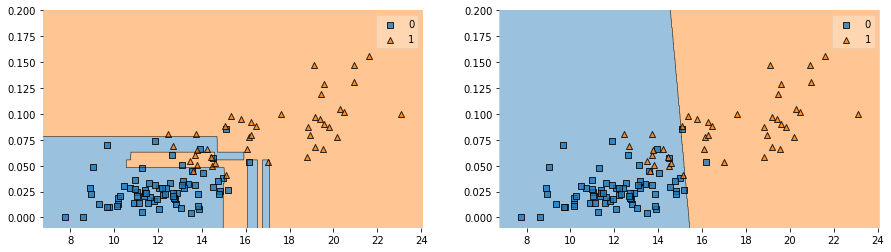

In [7]:
plt.figure(figsize=(15,4))
X_plot = X_test.values
y_plot = y_test.values
plt.subplot(121)
plt.ylim(ymin = -0.01, ymax = 0.20)
plot_decision_regions(X_plot, y_plot, dt)
plt.subplot(122)
plt.ylim(ymin = -0.01, ymax = 0.20)
plot_decision_regions(X_plot, y_plot, logreg)
plt.show()

Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

<img src="./pic/tree.png" width="400">
<img src="./pic/ig.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Using entropy as a criterion</h1><div class=""><p><p>In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entopy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.</p>
<p><code>X_train</code> as well as the array of labels <code>y_train</code> are available in your workspace.</p></div></div>

In [8]:
X = breast_df.drop('diagnosis', axis=1)
y = breast_df.diagnosis.replace(['M', 'B'], [1,0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42, stratify = y)

In [9]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

<p class="">Wonderful! In the next exercise, you'll compare the accuracy of <code>dt_entropy</code> to the accuracy of a another tree trained using the gini-index as the information criterion.</p>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Entropy vs Gini index</h1><div class=""><p><p>In this exercise you'll compare the test set accuracy of <code>dt_entropy</code> to the accuracy of another tree named <code>dt_gini</code>. The tree <code>dt_gini</code> was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword <code>'gini'</code>.</p>
<p><code>X_test</code>, <code>y_test</code>, <code>dt_entropy</code>, as well as <code>accuracy_gini</code> which corresponds to the test set accuracy achieved by <code>dt_gini</code> are available in your workspace.</p></div></div>

In [10]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Predict test set labels
y_pred = dt_gini.predict(X_test)

# Compute test set accuracy  
accuracy_gini = accuracy_score(y_test, y_pred)

In [11]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9298245614035088


<div class="dc-completed__message"><p class="">Nice work!  Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the <code>DecisionTreeClassifier</code> model of scikit-learn.</p></div>

<img src="./pic/ig_reg.png" width="600">

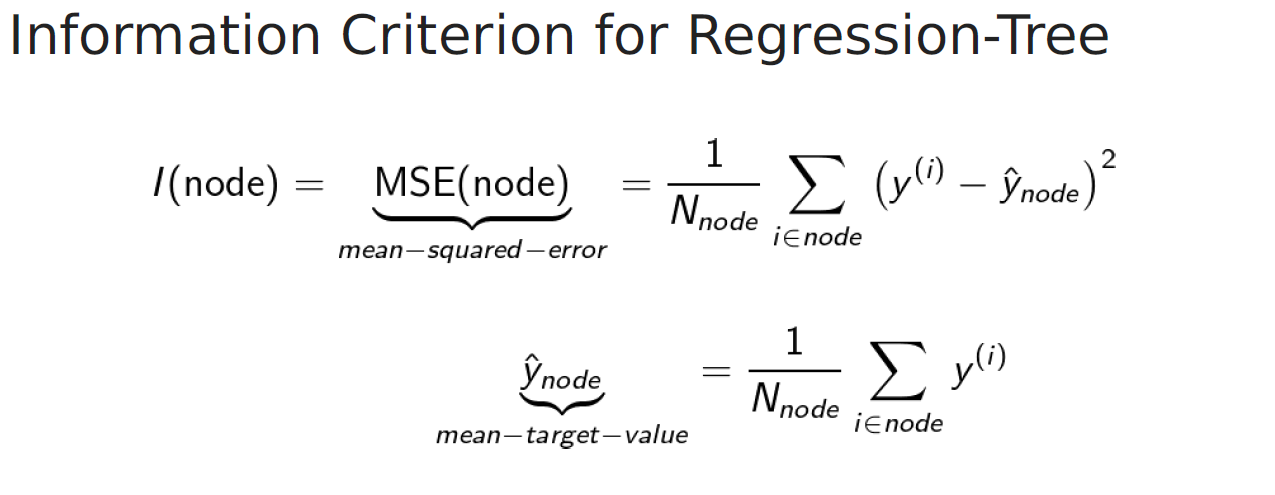

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train your first regression tree</h1><div class=""><p><p>In this exercise, you'll train a regression tree to predict the <code>mpg</code> (miles per gallon) consumption of cars in the <a href="https://www.kaggle.com/uciml/autompg-dataset" target="_blank" rel="noopener noreferrer">auto-mpg dataset</a> using all the six available features.</p>
<p>The dataset is processed for you and is split to 80% train and 20% test. The features matrix <code>X_train</code> and the array <code>y_train</code> are available in your workspace.</p></div></div>

In [12]:
auto_df = pd.read_csv('./data/auto.csv')
auto_df = pd.get_dummies(auto_df)

In [13]:
X = auto_df.drop('mpg', axis=1)
y = auto_df.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42)

In [14]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the regression tree</h1><div class=""><p><p>In this exercise, you will evaluate the test set performance of <code>dt</code> using the  Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).</p>
<p>The features matrix <code>X_test</code>, the array <code>y_test</code>, as well as the decision tree regressor <code>dt</code> that you trained in the previous exercise are available in your workspace.</p></div></div>

In [15]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.82


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear regression vs regression tree</h1><div class=""><p><p>In this exercise, you'll compare the test set RMSE of <code>dt</code> to that achieved by a linear regression model. We have already instantiated a linear regression model <code>lr</code> and trained it on the same dataset as <code>dt</code>. </p>
<p>The features matrix <code>X_test</code>, the array of labels  <code>y_test</code>, the trained linear regression model <code>lr</code>, <code>mean_squared_error</code> function which was imported under the alias <code>MSE</code> and <code>rmse_dt</code> from the previous exercise are available in your workspace.</p></div></div>

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 4.30
Regression Tree test set RMSE: 4.82


# <font color=red>02 - The Bias-Variance Tradeoff</font> 

<div class="dc-u-p-24"><h1 class="dc-h3">Complexity, bias and variance</h1><div class=""><p>In the video, you saw how the complexity of a model labeled <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>f</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.028em, 1000.64em, 2.555em, -1000em); top: -2.19em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="texatom" id="MathJax-Span-3"><span class="mrow" id="MathJax-Span-4"><span class="munderover" id="MathJax-Span-5"><span style="display: inline-block; position: relative; width: 0.756em; height: 0px;"><span style="position: absolute; clip: rect(3.141em, 1000.55em, 4.372em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-6" style="font-family: MathJax_Math; font-style: italic;">f<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.06em;"></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(3.152em, 1000.39em, 3.636em, -1000em); top: -4.314em; left: 0.256em;"><span class="mo" id="MathJax-Span-7" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.19em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.537em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>f</mi><mo stretchy="false">^</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-1">\hat{f}</script> influences the bias and variance terms of its generalization error.<br>
Which of the following correctly describes the relationship between <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>f</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-8" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.028em, 1000.64em, 2.555em, -1000em); top: -2.19em; left: 0em;"><span class="mrow" id="MathJax-Span-9"><span class="texatom" id="MathJax-Span-10"><span class="mrow" id="MathJax-Span-11"><span class="munderover" id="MathJax-Span-12"><span style="display: inline-block; position: relative; width: 0.756em; height: 0px;"><span style="position: absolute; clip: rect(3.141em, 1000.55em, 4.372em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-13" style="font-family: MathJax_Math; font-style: italic;">f<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.06em;"></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(3.152em, 1000.39em, 3.636em, -1000em); top: -4.314em; left: 0.256em;"><span class="mo" id="MathJax-Span-14" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.19em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.537em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>f</mi><mo stretchy="false">^</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-2">\hat{f}</script>'s complexity and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>f</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-15" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.028em, 1000.64em, 2.555em, -1000em); top: -2.19em; left: 0em;"><span class="mrow" id="MathJax-Span-16"><span class="texatom" id="MathJax-Span-17"><span class="mrow" id="MathJax-Span-18"><span class="munderover" id="MathJax-Span-19"><span style="display: inline-block; position: relative; width: 0.756em; height: 0px;"><span style="position: absolute; clip: rect(3.141em, 1000.55em, 4.372em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-20" style="font-family: MathJax_Math; font-style: italic;">f<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.06em;"></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(3.152em, 1000.39em, 3.636em, -1000em); top: -4.314em; left: 0.256em;"><span class="mo" id="MathJax-Span-21" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.19em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.537em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>f</mi><mo stretchy="false">^</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-3">\hat{f}</script>'s bias and variance terms?</p></div></div>

- As the complexity of $f$ decreases, the bias term decreases while the variance term increases.
- As the complexity of $f$ decreases, both the bias and the variance terms increase.
- As the complexity of $f$ increases, the bias term increases while the variance term decreases.
- As the complexity of $f$ increases, the bias term decreases while the variance term increases *

<div class="dc-u-p-24"><h1 class="dc-h3">Overfitting and underfitting</h1><div class=""><p>In this exercise, you'll visually diagnose whether a model is overfitting or underfitting the training set.</p>
<p>For this purpose, we have trained two different models <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>A</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-50" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.474em, 1000.72em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-51"><span class="mi" id="MathJax-Span-52" style="font-family: MathJax_Math; font-style: italic;">A</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.963em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>A</mi></math></span></span><script type="math/tex" id="MathJax-Element-8">A</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>B</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-53" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1000.75em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-54"><span class="mi" id="MathJax-Span-55" style="font-family: MathJax_Math; font-style: italic;">B</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>B</mi></math></span></span><script type="math/tex" id="MathJax-Element-9">B</script> on the auto dataset to predict the <code>mpg</code> consumption of a car using only the car's displacement (<code>displ</code>) as a feature.</p>
<p>The following figure shows you scatterplots of <code>mpg</code> versus <code>displ</code> along with lines corresponding to the training set predictions of models <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>A</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-56" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.474em, 1000.72em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-57"><span class="mi" id="MathJax-Span-58" style="font-family: MathJax_Math; font-style: italic;">A</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.963em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>A</mi></math></span></span><script type="math/tex" id="MathJax-Element-10">A</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>B</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-59" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1000.75em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-60"><span class="mi" id="MathJax-Span-61" style="font-family: MathJax_Math; font-style: italic;">B</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>B</mi></math></span></span><script type="math/tex" id="MathJax-Element-11">B</script> in red.</p>
<p><img src="https://assets.datacamp.com/production/repositories/1796/datasets/f905399bc06da86c2a3af27b20717de5a777e6e1/diagnose-problems.jpg" alt="diagnose"></p>
<p>Which of the following statement is true?</p></div></div>

- $A$ suffers from high bias and overfits the training set.
- $A$ suffers from high variance and underfits the training set.
- $B$ suffers from high bias and underfits the training set.
- $B$ suffers from high variance and underfits the training set.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Instantiate the model</h1><div class=""><p><p>In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.</p>
<p>We have already processed the data and loaded the features matrix <code>X</code> and the array <code>y</code> in your workspace. In addition, the <code>DecisionTreeRegressor</code> class was imported from <code>sklearn.tree</code>.</p></div></div>

In [18]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the 10-fold CV error</h1><div class=""><p><p>In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree <code>dt</code> that you instantiated in the previous exercise.</p>
<p>In addition to <code>dt</code>, the training data including <code>X_train</code> and <code>y_train</code> are available in your workspace. We also imported <code>cross_val_score</code> from <code>sklearn.model_selection</code>.</p>
<p>Note that since <code>cross_val_score</code> has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs.</p></div></div>

In [19]:
# Import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = MSE_CV_scores.mean()**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the training error</h1><div class=""><p><p>You'll now evaluate the training set RMSE achieved by the regression tree <code>dt</code> that you instantiated in a previous exercise.</p>
<p>In addition to <code>dt</code>, <code>X_train</code> and <code>y_train</code> are available in your workspace.</p></div></div>

In [20]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">High bias or high variance?</h1><div class=""><p><p>In this exercise you'll diagnose whether the regression tree <code>dt</code> you trained in the previous exercise suffers from a bias or a variance problem. </p>
<p>The training set RMSE (<code>RMSE_train</code>) and the CV RMSE (<code>RMSE_CV</code>) achieved by <code>dt</code> are available in your workspace. In addition, we have also loaded a variable called <code>baseline_RMSE</code> which corresponds to the minimum desired RMSE. <code>baseline_RMSE</code> corresponds to the error achieved by a regression-tree trained with the <code>disp</code> feature only (Chapter 1, Lesson 3).</p>
<p>Does <code>dt</code> suffer from a high bias or a high variance problem?</p></div></div>

In [21]:
print(RMSE_train)
print(RMSE_CV)
print(rmse_dt)

5.151299302408305
5.143255076652255
4.818124210449816


dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

<img src="./pic/ensemble.png" width="600">

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Define the ensemble</h1><div class=""><p><p>In the following set of exercises, you'll work with the <a href="https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset" target="_blank" rel="noopener noreferrer">Indian Liver Patient Dataset</a> from the UCI Machine learning repository. </p>
<p>In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset. </p>
<p>The classes <code>LogisticRegression</code>, <code>DecisionTreeClassifier</code>, and <code>KNeighborsClassifier</code> under the alias <code>KNN</code> are available in your workspace.</p></div></div>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [23]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

In [24]:
indian = pd.read_csv("./data/indian_liver_patient_preprocessed.csv", index_col=0)
X_indian = indian.drop('Liver_disease', axis=1)
y_indian = indian.Liver_disease
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, 
                                                    test_size=0.3, random_state=SEED)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate individual classifiers</h1><div class=""><p><p>In this exercise you'll evaluate the performance of the models in the list <code>classifiers</code> that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.</p>
<p>The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have loaded the list <code>classifiers</code> from the previous exercise, as well as the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p></div></div>

In [25]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.701
Classification Tree : 0.730


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Better performance with a Voting Classifier</h1><div class=""><p><p>Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list <code>classifiers</code> and assigns labels by majority voting.  </p>
<p><code>X_train</code>, <code>X_test</code>,<code>y_train</code>, <code>y_test</code>, the list <code>classifiers</code> defined in a previous exercise, as well as the function <code>accuracy_score</code> from <code>sklearn.metrics</code> are available in your workspace.</p></div></div>

In [26]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


<p class="">Great work! Notice how the voting classifier achieves a test set accuracy of 75.3%. This value is greater than that achieved by <code>LogisticRegression</code>.</p>

In [27]:
# <font color=red>03 - Bagging and Random Forests </font> 

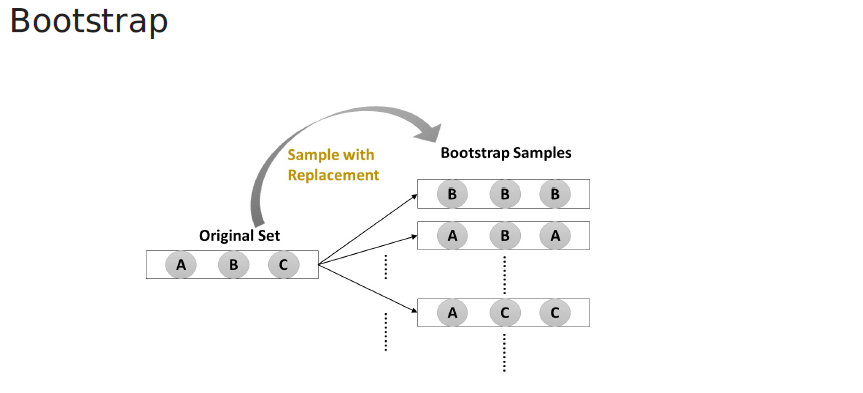

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Define the bagging classifier</h1><div class=""><p><p>In the following exercises you'll work with the <a href="https://www.kaggle.com/uciml/indian-liver-patient-records" target="_blank" rel="noopener noreferrer">Indian Liver Patient</a> dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.</p></div></div>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, 
                                                    test_size=0.2, random_state=SEED)

In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate Bagging performance</h1><div class=""><p><p>Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy. </p>
<p>The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the bagging classifier <code>bc</code> that you instantiated in the previous exercise and the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p></div></div>

In [30]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


<div class="dc-completed__message"><p class="">Great work! A single tree <code>dt</code> would have achieved an accuracy of 63% which is 8% lower than <code>bc</code>'s accuracy!</p></div>

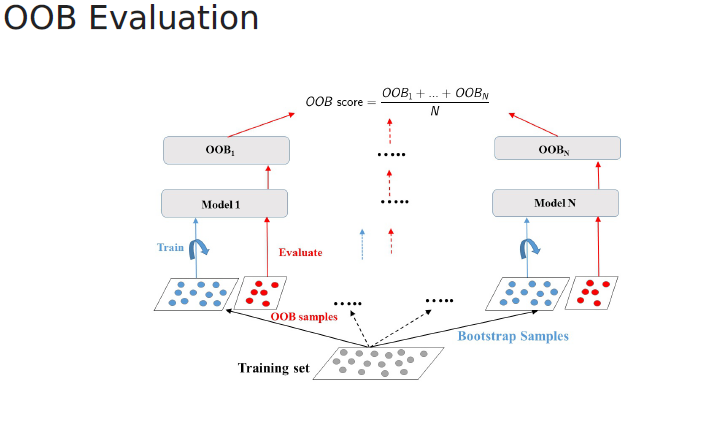

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Prepare the ground</h1><div class=""><p><p>In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset. </p>
<p>In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter <code>oob_score</code> to <code>True</code> during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the <code>.oob_score_</code> attribute from the corresponding instance.</p>
<p>In your environment, we have made available the class <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p></div></div>

In [31]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">OOB Score vs Test Set Score</h1><div class=""><p><p>Now that you instantiated <code>bc</code>, you will fit it to the training set and evaluate its test set and OOB accuracies. </p>
<p>The dataset is processed for you and split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the classifier <code>bc</code> instantiated in the previous exercise and the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p></div></div>

In [32]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.724, OOB accuracy: 0.687


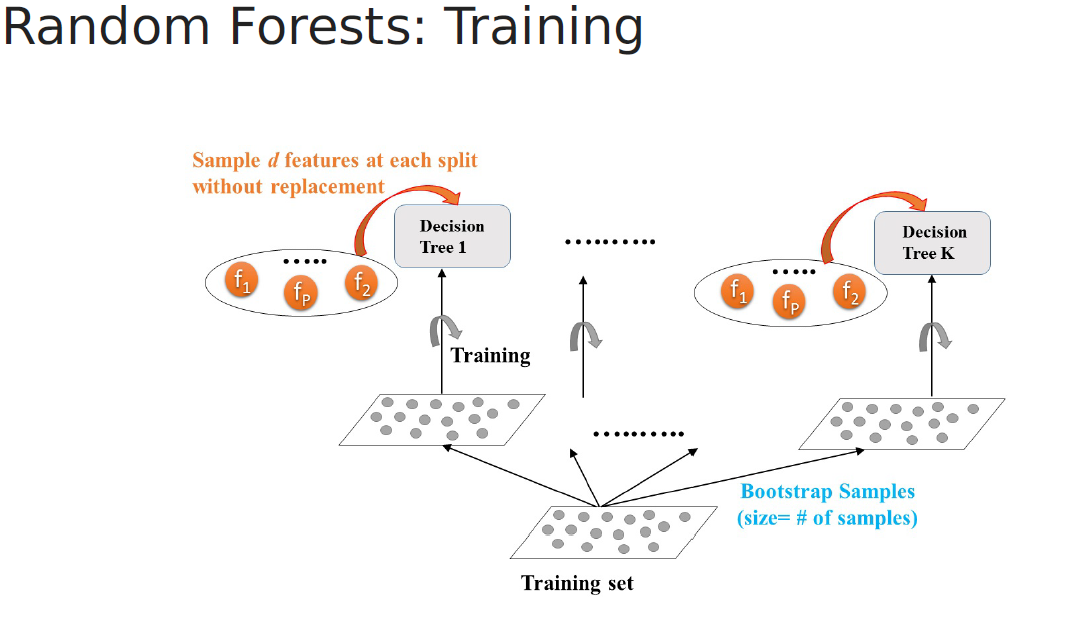

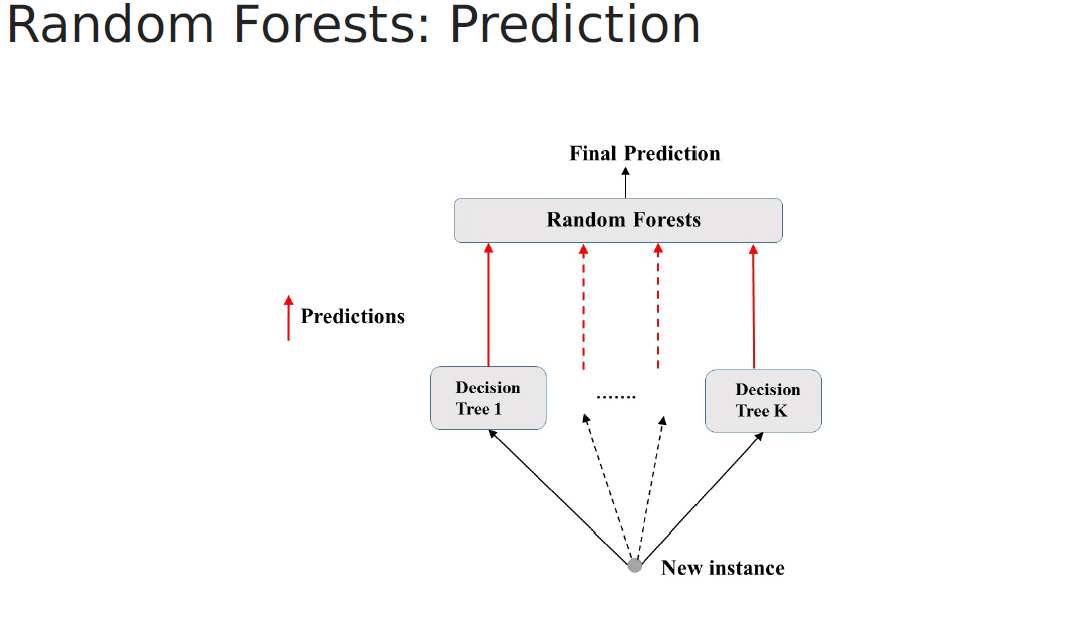

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train an RF regressor</h1><div class=""><p><p>In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the <a href="https://www.kaggle.com/c/bike-sharing-demand" target="_blank" rel="noopener noreferrer">Bike Sharing Demand</a> dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.</p>
<p>The dataset is processed for you and split into 80% train and 20% test. The features matrix <code>X_train</code> and the array <code>y_train</code> are available in your workspace.</p></div></div>

In [33]:
bike_df = pd.read_csv('./data/bikes.csv')
X_bikes = bike_df.drop("cnt", axis=1)
y_bikes = bike_df.cnt

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, 
                                                    test_size=0.3, random_state=SEED)

In [35]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the RF regressor</h1><div class=""><p><p>You'll now evaluate the test set RMSE of the random forests regressor <code>rf</code> that you trained in the previous exercise. </p>
<p>The dataset is processed for you and split into 80% train and 20% test. The features matrix <code>X_test</code>, as well as the array <code>y_test</code> are available in your workspace. In addition, we have also loaded the model <code>rf</code> that you trained in the previous exercise.</p></div></div>

In [36]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 50.01


<div class="dc-completed__message"><p class="">Great work! You can try training a single CART on the same dataset. The test set RMSE achieved by <code>rf</code> is significantly smaller than that achieved by a single CART!</p></div>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing features importances</h1><div class=""><p><p>In this exercise, you'll determine which features were the most predictive according to the random forests regressor <code>rf</code> that you trained in a previous exercise. </p>
<p>For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by <code>rf</code>. Fortunately, this can be done easily thanks to plotting capabilities of <code>pandas</code>.</p>
<p>We have created a <code>pandas.Series</code> object called <code>importances</code> containing the feature names as <code>index</code> and their importances as values. In addition, <code>matplotlib.pyplot</code> is available as <code>plt</code> and <code>pandas</code> as <code>pd</code>.</p></div></div>

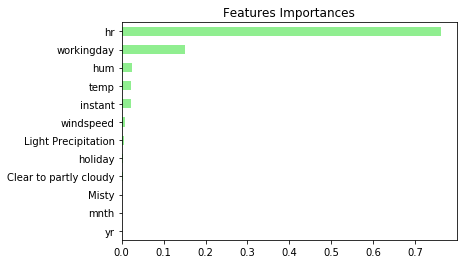

In [37]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# <font color=red>04 - Boosting </font> 

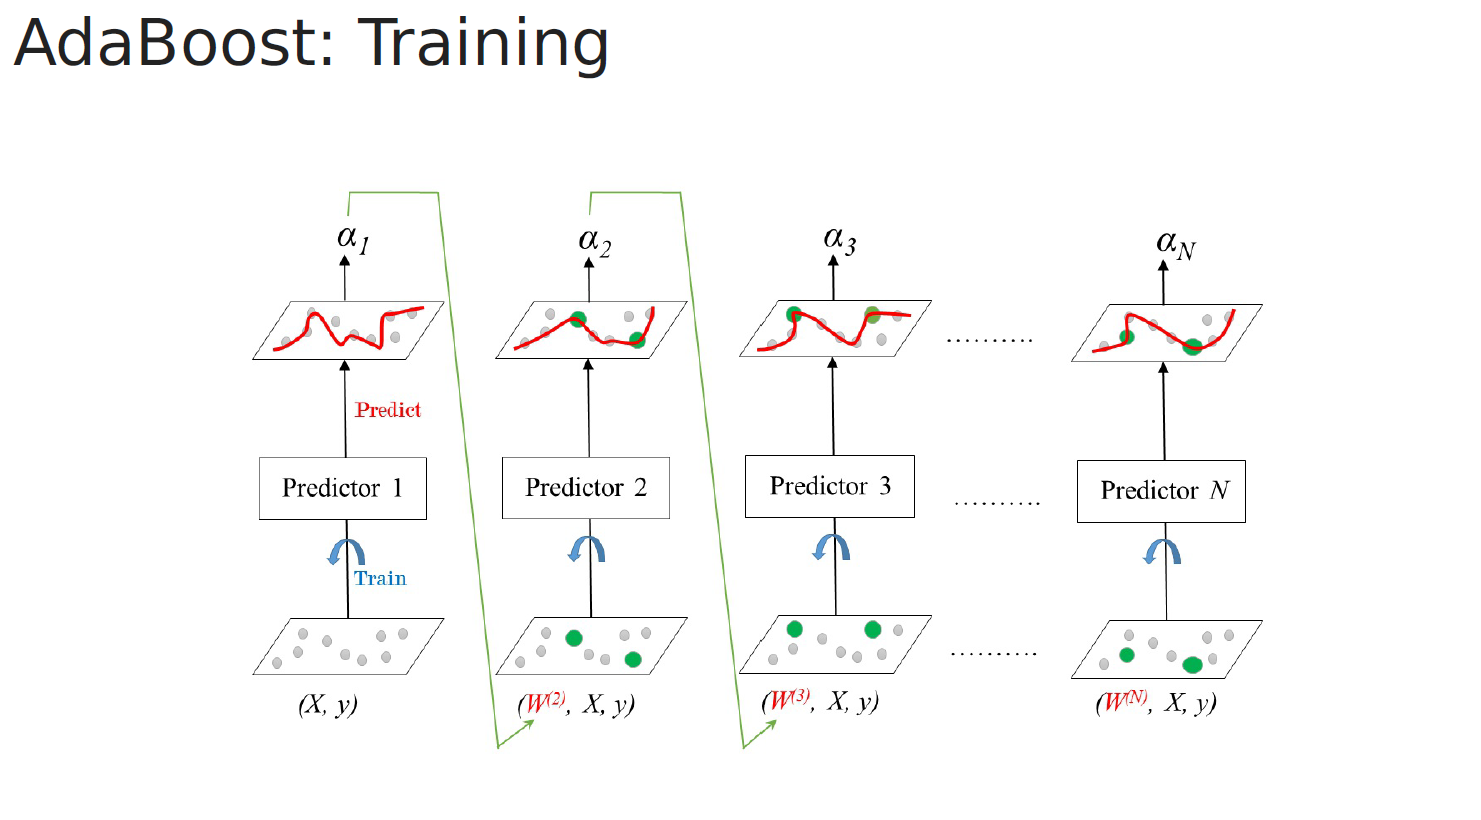

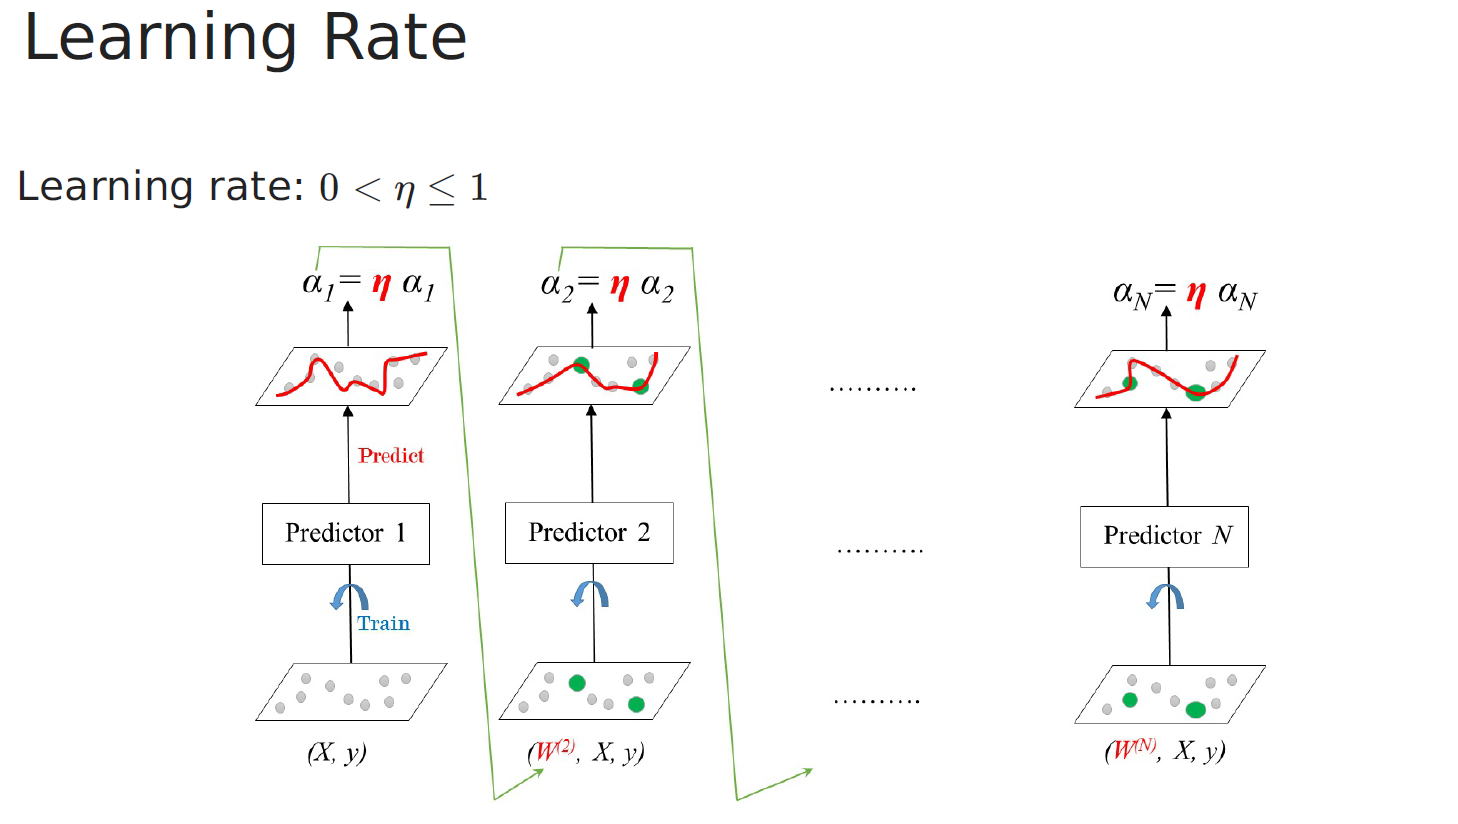

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Define the AdaBoost classifier</h1><div class=""><p><p>In the following exercises you'll revisit the <a href="https://www.kaggle.com/uciml/indian-liver-patient-records" target="_blank" rel="noopener noreferrer">Indian Liver Patient</a> dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.</p>
<p>As a first step, you'll start by instantiating an AdaBoost classifier.</p></div></div>

In [38]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train the AdaBoost classifier</h1><div class=""><p><p>Now that you've instantiated the AdaBoost classifier <code>ada</code>, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows: </p>
<p>Once the classifier <code>ada</code> is trained, call the <code>.predict_proba()</code> method by passing <code>X_test</code> as a parameter and extract these probabilities by slicing all the values in the second column as follows:</p>
<pre><code>ada.predict_proba(X_test)[:,1]
</code></pre>
<p>The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the 
instantiated model <code>ada</code> from the previous exercise.</p></div></div></div>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, 
                                                    test_size=0.2, random_state=SEED)

In [40]:
# Fit ada to the training set
ada.fit (X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the AdaBoost classifier</h1><div class=""><p><p>Now that you're done training <code>ada</code> and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate <code>ada</code>'s ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the <code>roc_auc_score()</code> function from <code>sklearn.metrics</code>.</p>
<p>The arrays <code>y_test</code> and <code>y_pred_proba</code> that you computed in the previous exercise are available in your workspace.</p></div></div>

In [41]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.64


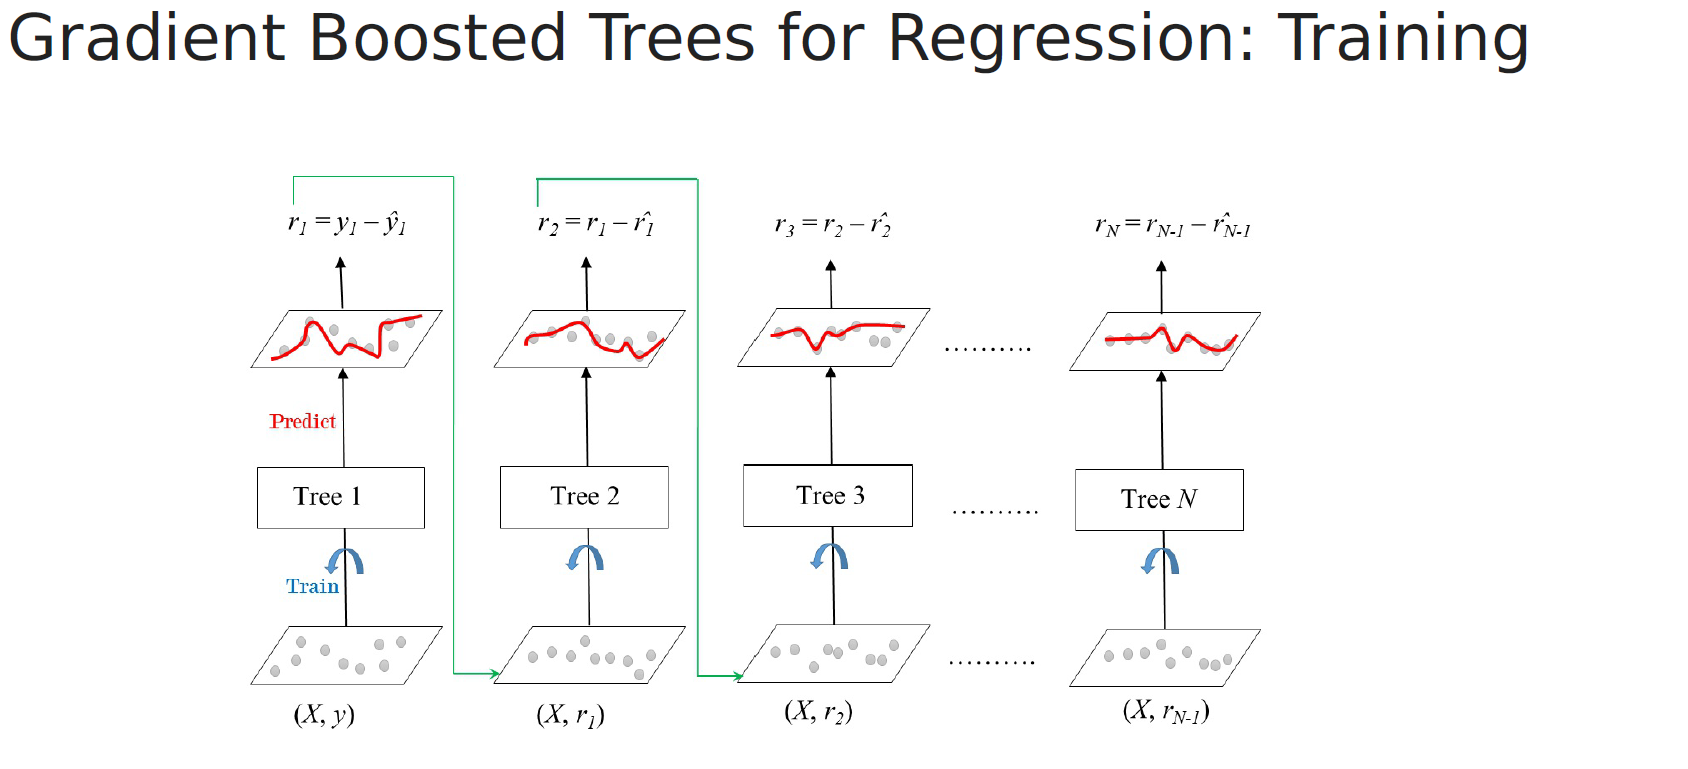

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Define the GB regressor</h1><div class=""><p><p>You'll now revisit the <a href="https://www.kaggle.com/c/bike-sharing-demand" target="_blank" rel="noopener noreferrer">Bike Sharing Demand</a> dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.</p>
<p>As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.</p></div></div>

In [42]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(n_estimators=200, 
            max_depth=4,
            random_state=2)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train the GB regressor</h1><div class=""><p><p>You'll now train the gradient boosting regressor <code>gb</code> that you instantiated in the previous exercise and predict test set labels.</p>
<p>The dataset is split into 80% train and 20% test. Feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the model instance <code>gb</code> that you defined in the previous exercise.</p></div></div>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, 
                                                    test_size=0.2, random_state=SEED)

In [44]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the GB regressor</h1><div class=""><p><p>Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of <code>gb</code>. </p>
<p><code>y_test</code> and predictions <code>y_pred</code> are available in your workspace.</p></div></div>

In [45]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 43.132


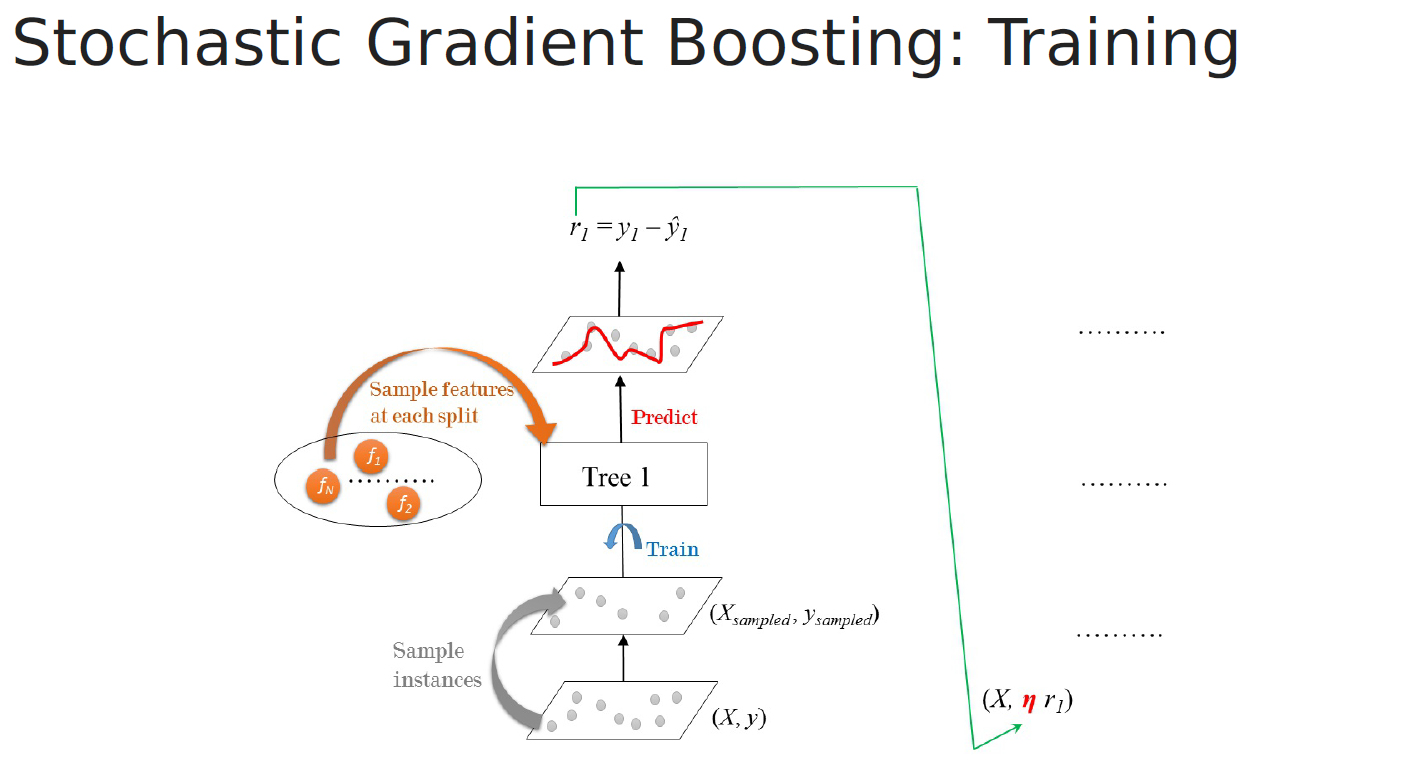

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Regression with SGB</h1><div class=""><p><p>As in the exercises from the previous lesson, you'll be working with the <a href="https://www.kaggle.com/c/bike-sharing-demand" target="_blank" rel="noopener noreferrer">Bike Sharing Demand</a> dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.</p></div></div>

In [46]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train the SGB regressor</h1><div class=""><p><p>In this exercise, you'll train the SGBR <code>sgbr</code> instantiated in the previous exercise and predict the test set labels.</p>
<p>The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, the arrays of labels <code>y_train</code> and <code>y_test</code>, and the model instance <code>sgbr</code> that you defined in the previous exercise are available in your workspace.</p></div></div>

In [47]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the SGB regressor</h1><div class=""><p><p>You have prepared the ground to determine the test set RMSE of <code>sgbr</code> which you shall evaluate in this exercise.</p>
<p><code>y_pred</code> and <code>y_test</code> are available in your workspace.</p></div></div>

In [48]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 44.747


# <font color=red>04 - Model Tuning</font> 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Tree hyperparameters</h1><div class=""><p><p>In the following exercises you'll revisit the <a href="https://www.kaggle.com/uciml/indian-liver-patient-records" target="_blank" rel="noopener noreferrer">Indian Liver Patient</a> dataset which was introduced in a previous chapter. </p>
<p>Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.</p>
<p>We have instantiated a <code>DecisionTreeClassifier</code> and assigned to <code>dt</code> with <code>sklearn</code>'s default hyperparameters. You can inspect the hyperparameters of <code>dt</code> in your console.</p>
<p>Which of the following is not a hyperparameter of <code>dt</code>?</p></div></div>

In [49]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, 
                                                    test_size=0.2, random_state=SEED)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Set the tree's hyperparameter grid</h1><div class=""><p><p>In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree <code>dt</code> and find the optimal classifier in the next exercise.</p></div></div>

In [51]:
# Define params_dt
params_dt = {
    'max_depth': [2,3,4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Search for the optimal tree</h1><div class=""><p><p>In this exercise, you'll perform grid search using 5-fold cross validation to find <code>dt</code>'s optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the <code>GridSearchCV</code> object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the <code>.fit()</code> method:</p>
<pre><code>grid_object.fit(X_train, y_train)
</code></pre>
<p>An untuned classification tree <code>dt</code> as well as the dictionary <code>params_dt</code> that you defined in the previous exercise are available in your workspace.</p></div></div>

In [52]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

We will fit the model to the trainig data for you and in the next exercise you will compute the test set ROC AUC score.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the optimal tree</h1><div class=""><p><p>In this exercise, you'll evaluate the test set ROC AUC score of <code>grid_dt</code>'s optimal model. </p>
<p>The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. <code>X_test</code>, <code>y_test</code> are available in your workspace. In addition, we have also loaded the trained <code>GridSearchCV</code> object <code>grid_dt</code> that you instantiated in the previous exercise. Note that <code>grid_dt</code> was trained as follows:</p>
<pre><code>grid_dt.fit(X_train, y_train)
</code></pre></div></div>

In [53]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [54]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.731


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Random forests hyperparameters</h1><div class=""><p><p>In the following exercises, you'll be revisiting the <a href="https://www.kaggle.com/c/bike-sharing-demand" target="_blank" rel="noopener noreferrer">Bike Sharing Demand</a> dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.</p>
<p>We have instantiated a <code>RandomForestRegressor</code> called <code>rf</code> using <code>sklearn</code>'s default hyperparameters. You can inspect the hyperparameters of <code>rf</code> in your console.</p>
<p>Which of the following is not a hyperparameter of <code>rf</code>?</p></div></div>

In [55]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Set the hyperparameter grid of RF</h1><div class=""><p><p>In this exercise, you'll manually set the grid of hyperparameters that will be used to tune <code>rf</code>'s hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.</p></div></div></div>

In [56]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators' : [100, 350, 500],
    'max_features' : ['log2', 'auto', 'sqrt'],
    'min_samples_leaf' : [2, 10, 30]
}

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Search for the optimal forest</h1><div class=""><p><p>In this exercise, you'll perform grid search using 3-fold cross validation to find <code>rf</code>'s optimal hyperparameters. To evaluate each model in the grid, you'll be using the <a href="http://scikit-learn.org/stable/modules/model_evaluation.html" target="_blank" rel="noopener noreferrer">negative mean squared error</a> metric. </p>
<p>Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the <code>GridSearchCV</code> object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the <code>.fit()</code> method: </p>
<pre><code>grid_object.fit(X_train, y_train)
</code></pre>
<p>The untuned random forests regressor model <code>rf</code> as well as the dictionary <code>params_rf</code> that you defined in the  previous exercise are available in your workspace.</p></div></div>

In [57]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Evaluate the optimal forest</h1><div class=""><p><p>In this last exercise of the course, you'll evaluate the test set RMSE of <code>grid_rf</code>'s optimal model.</p>
<p>The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available <code>X_test</code>, <code>y_test</code> and the function <code>mean_squared_error</code> from <code>sklearn.metrics</code> under the alias <code>MSE</code>.  In addition, we have also loaded the trained <code>GridSearchCV</code> object <code>grid_rf</code> that you instantiated in the previous exercise. Note that <code>grid_rf</code> was trained as follows:</p>
<pre><code>grid_rf.fit(X_train, y_train)
</code></pre></div></div>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, 
                                                    test_size=0.2, random_state=SEED)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   26.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [59]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE  

# Extract the best estimator
best_model = grid_rf.best_estimator_

 # Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 51.755
